In [ ]:
# File Handling
import os

# Data manipulation
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
# SciKit-Learn implementations
from sklearn.linear_model import LogisticRegression as SciKitLearnLogisticRegression
from sklearn.naive_bayes import MultinomialNB as SciKitLearnNaiveBayes
from sklearn.neighbors import KNeighborsClassifier as SciKitLearnKNearestNeighbors
from sklearn.tree import DecisionTreeClassifier as SciKitLearnDecisionTree
from sklearn.ensemble import RandomForestClassifier as SciKitLearnRandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier as SciKitLearnAdaBoostClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# K-Fold Cross Validation
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_score

In [ ]:
file_path = "hotel_bookings.csv"
df = pd.read_csv(file_path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Duplicate rows: Duplicate rows with identical values in all columns could indicate data duplication or recording errors, and may need to be addressed during data cleaning.

In [ ]:
print("The number of duplicate rows are: ")
print(df.duplicated().sum())
print("-" * 100)

The number of duplicate rows are: 
31994
----------------------------------------------------------------------------------------------------


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.duplicated().sum())

0


Missing or null values: Missing or null values in any of the columns could indicate incomplete or inconsistent data, and may require imputation or removal during data cleaning.

In [ ]:
df['children'].fillna(0, inplace=True)
# For country column, replace missing values with 'Unknown'
df['country'].fillna('Unknown', inplace=True)
# For agent and company columns, replace missing values with 0
df['agent'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
# For all remaining rows with missing values, drop the row
df.dropna(inplace=True)

Adult, children, and babies all having a value of 0: This could indicate that a reservation or booking record is missing information or has incorrect data, as it is unlikely for a reservation to have no guests (adults, children, or babies).

In [ ]:
zero_guests_mask = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)
zero_guests_rows = df[zero_guests_mask]
# Print the number of rows where all guests are 0
print("The number of rows where all guests are 0 are: ")
print(zero_guests_rows.shape[0])


The number of rows where all guests are 0 are: 
166


In [ ]:
df.drop(zero_guests_rows.index, inplace=True)

In [ ]:
zero_guests_mask = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)
zero_guests_rows = df[zero_guests_mask]
# Print the number of rows where all guests are 0
print("The number of rows where all guests are 0 are: ")
print(zero_guests_rows.shape[0])

The number of rows where all guests are 0 are: 
0


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,0.0,0,Transient,151.20,0,2,Check-Out,2017-09-07


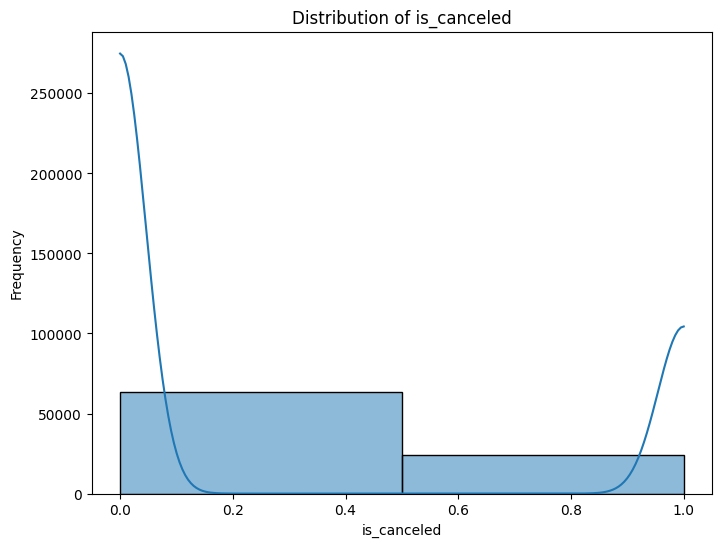

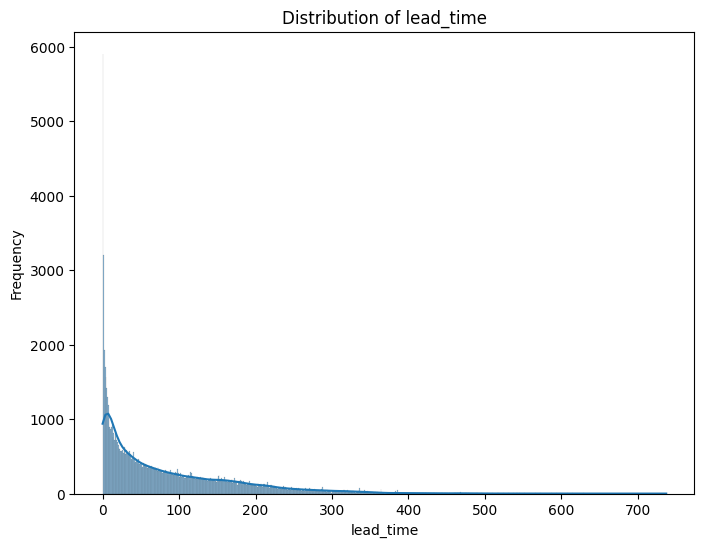

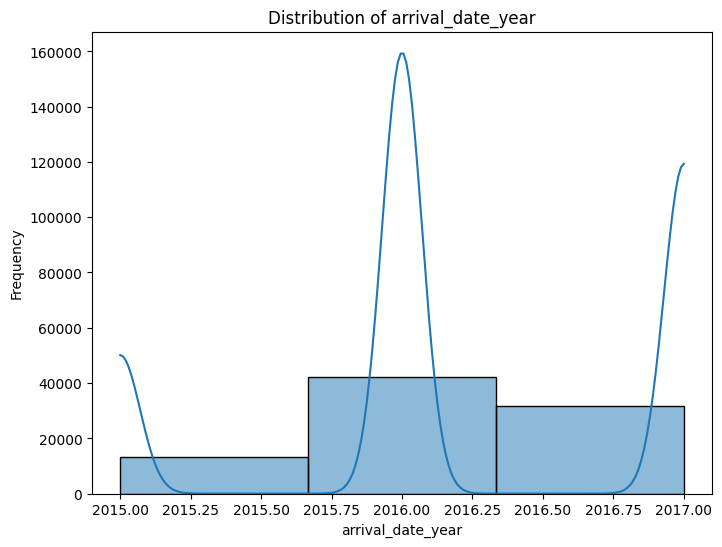

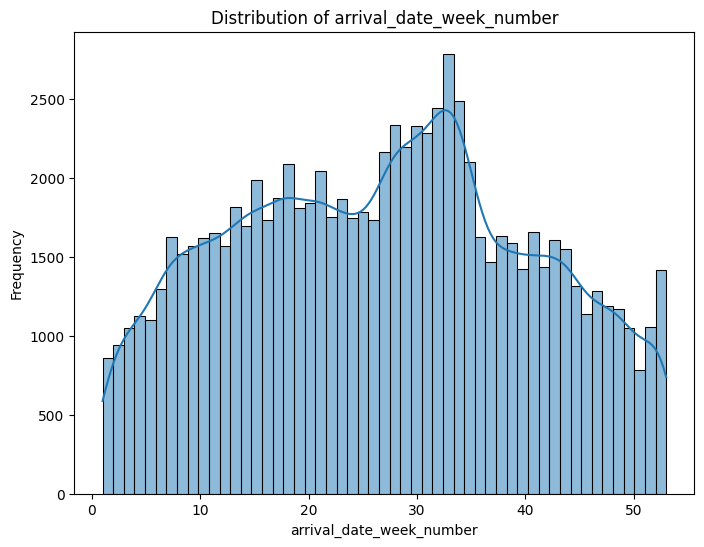

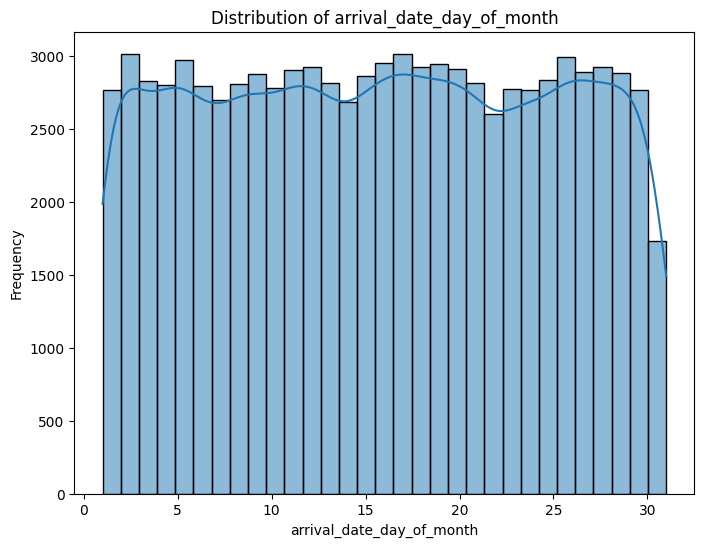

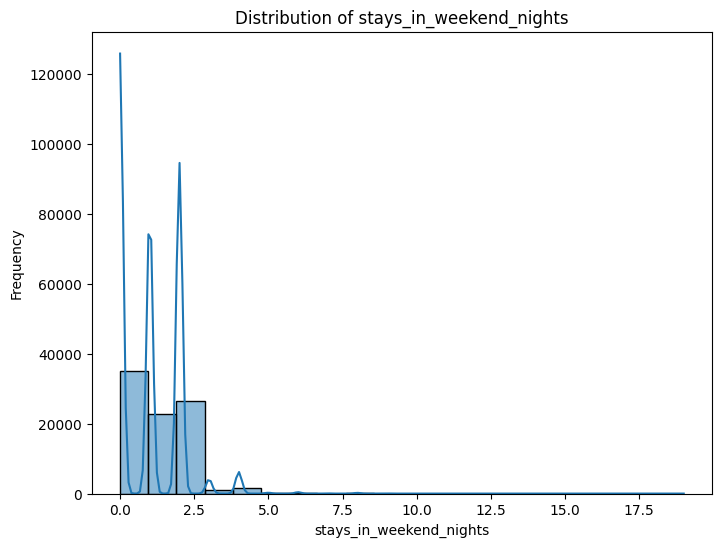

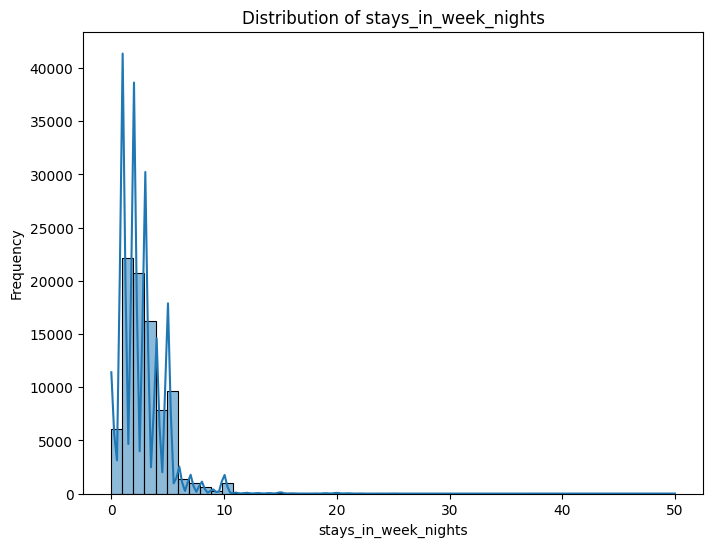

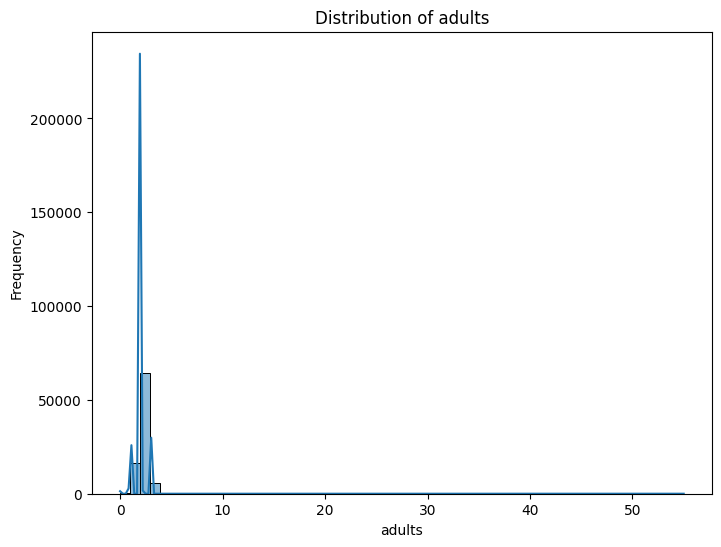

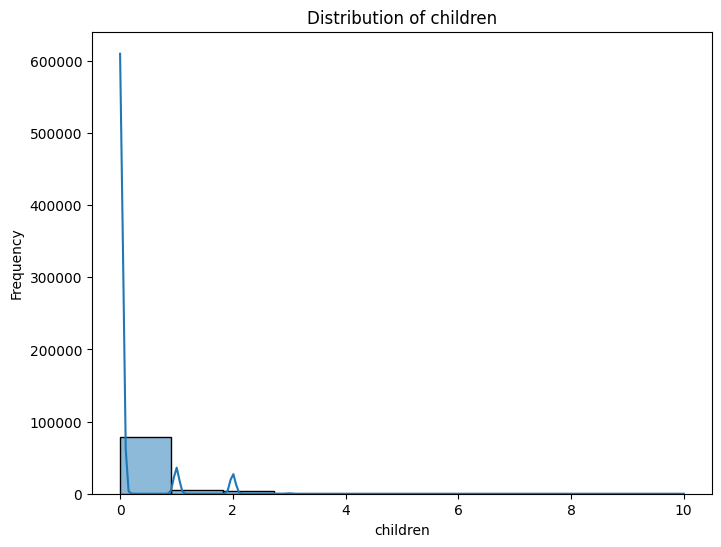

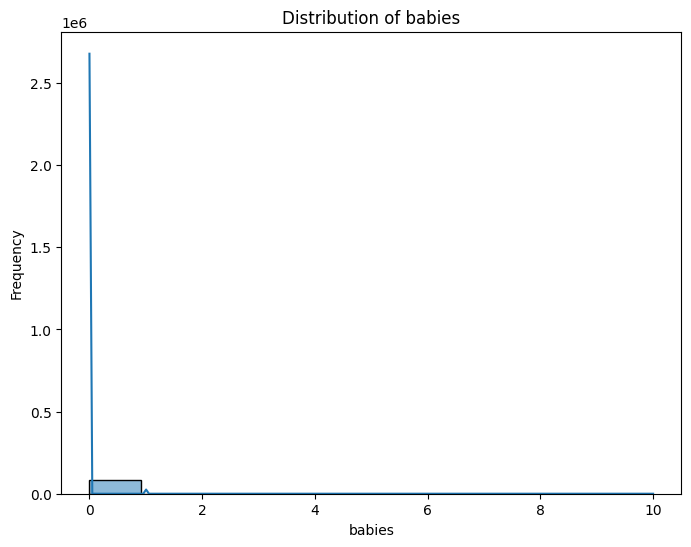

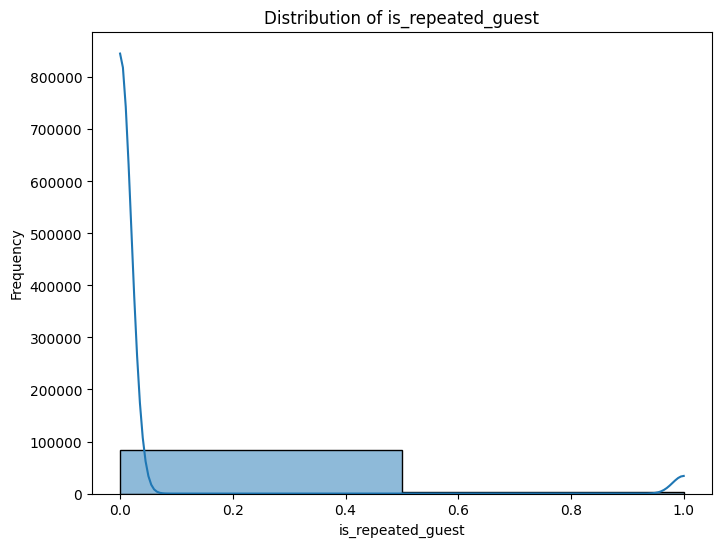

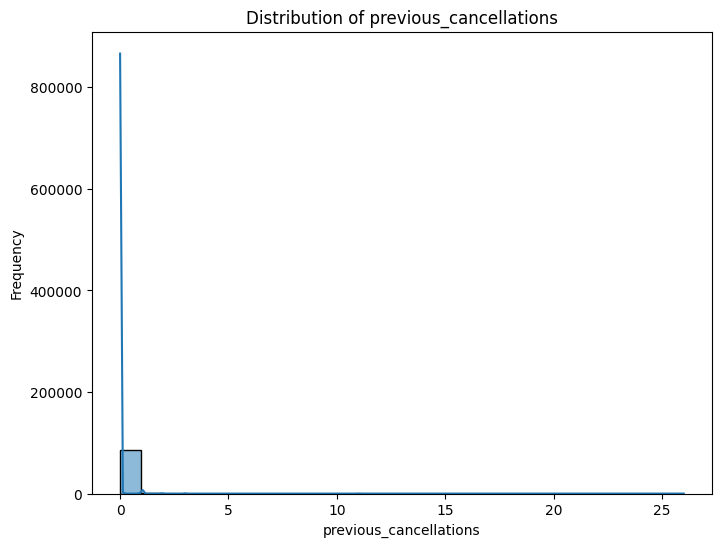

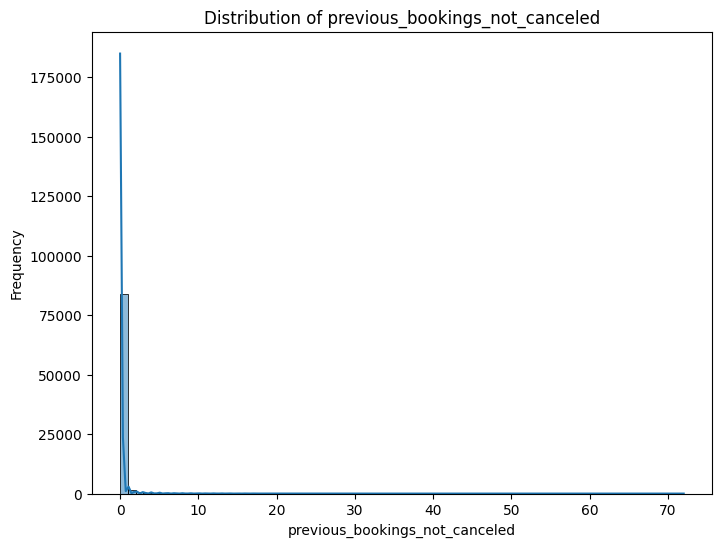

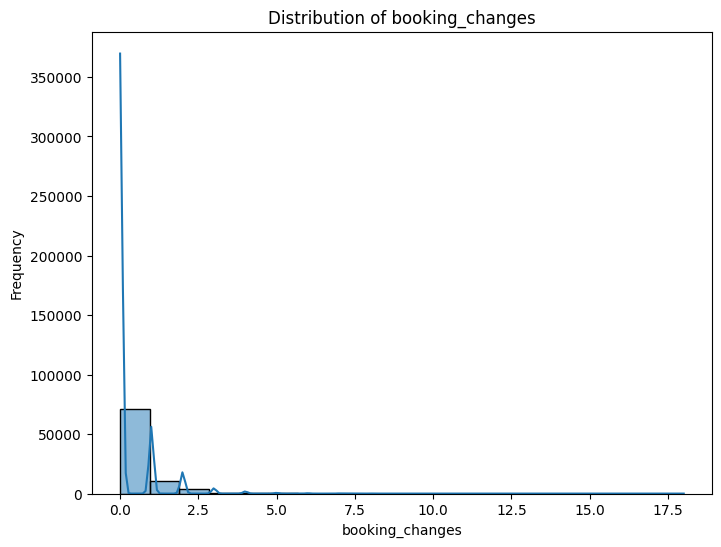

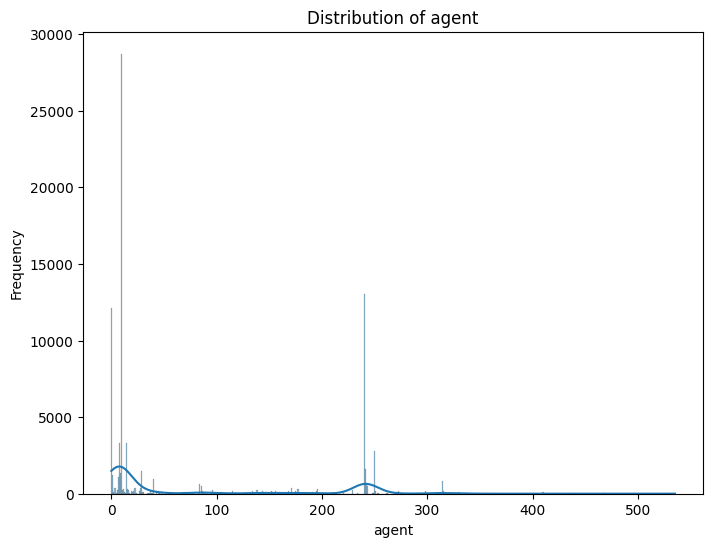

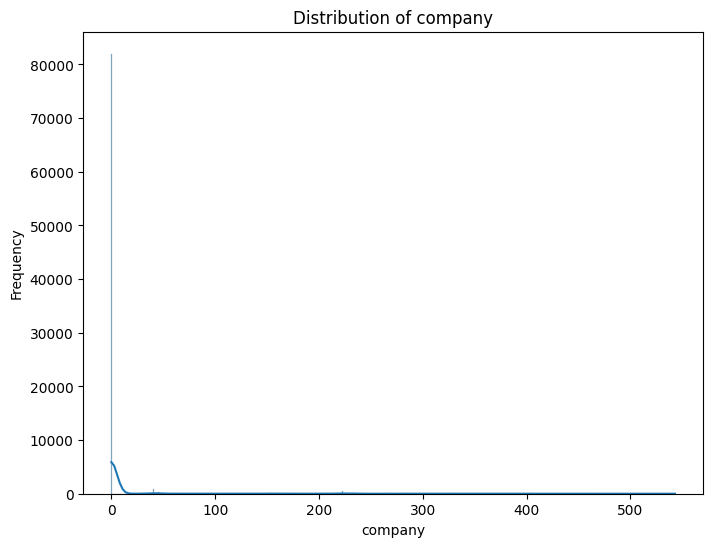

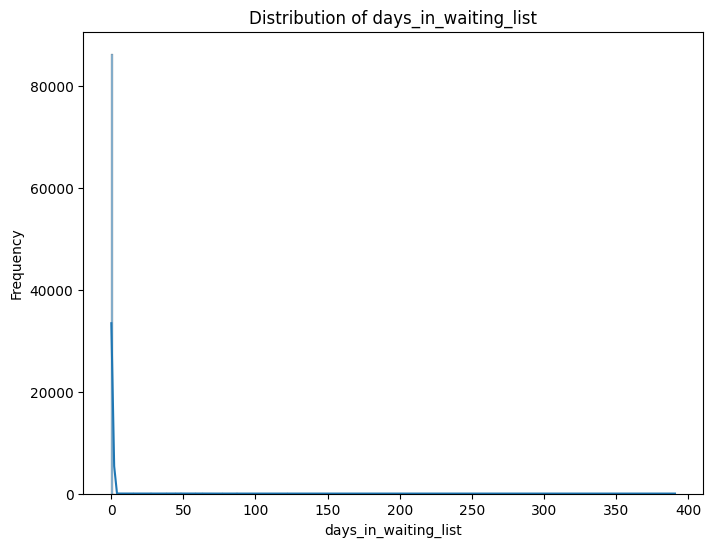

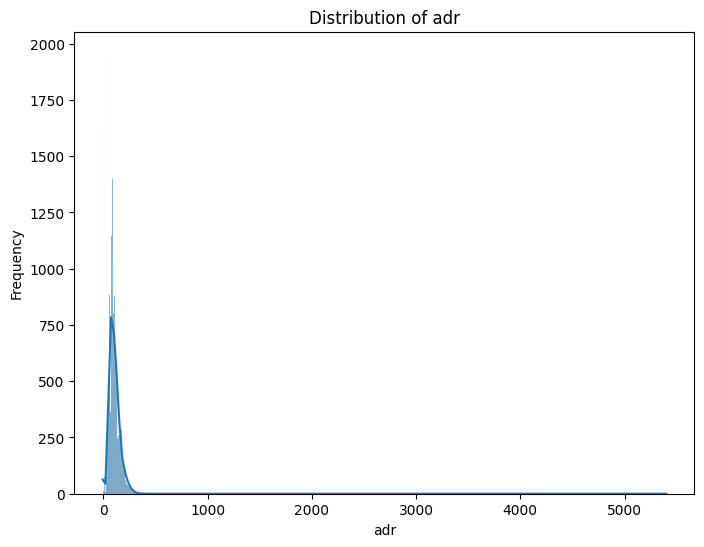

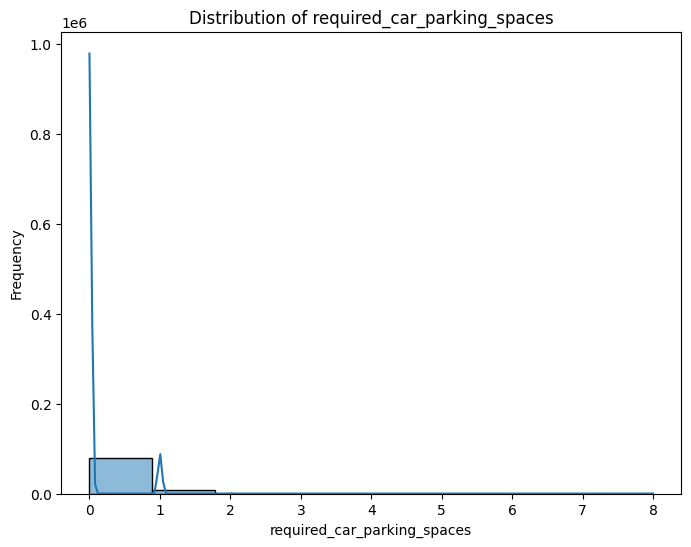

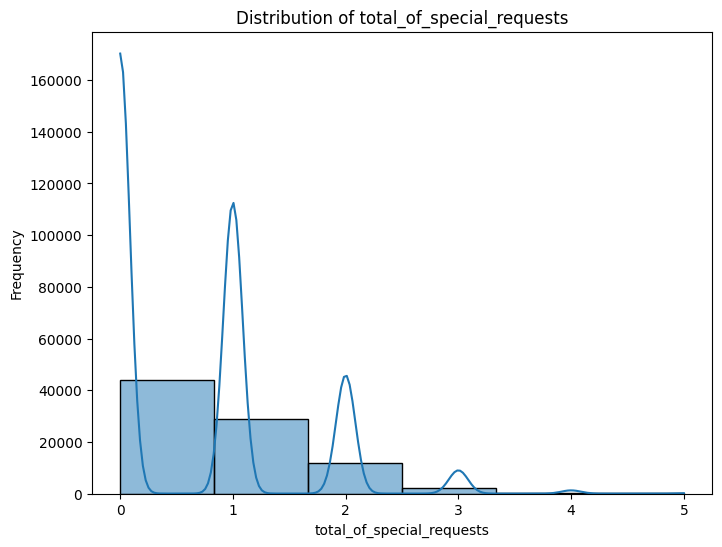

In [ ]:
# Distribution of numerical variables
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Loop through numerical columns
for col in numerical_columns:
    # Get the range of data in the column
    data_range = df[col].max() - df[col].min()
    # Set the number of bins as the range of data
    num_bins = int(data_range) + 1
    # Create histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=num_bins, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

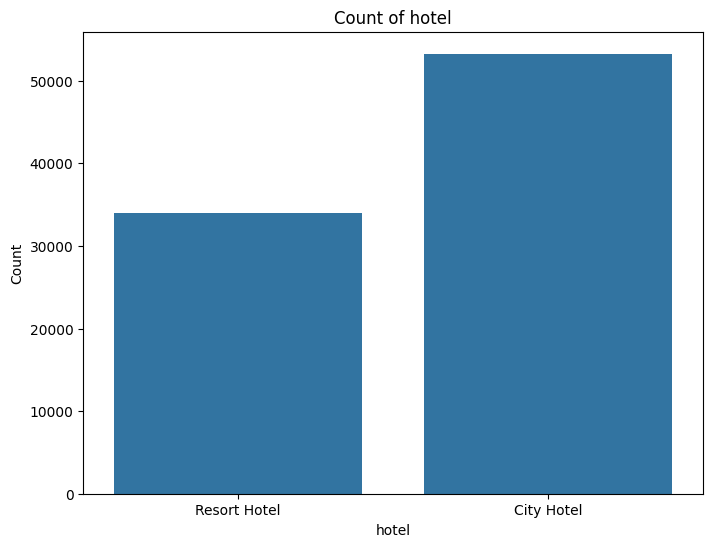

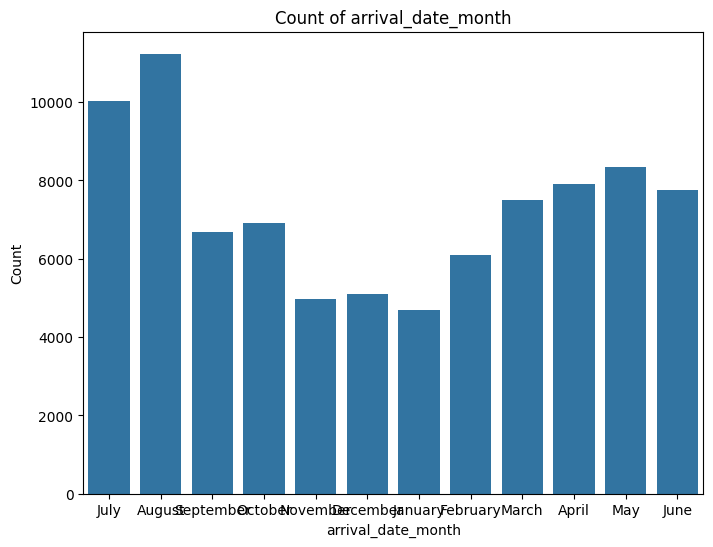

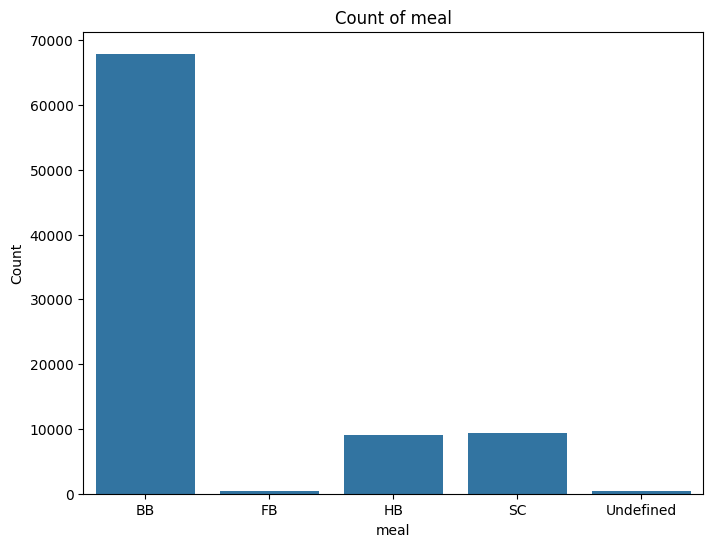

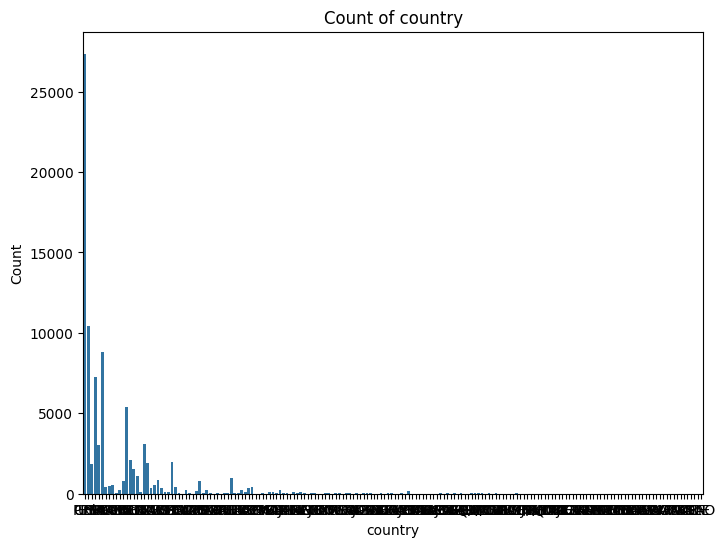

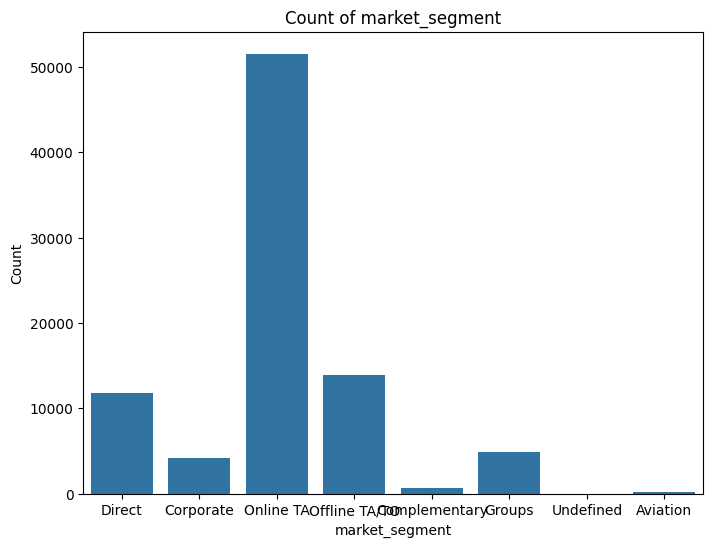

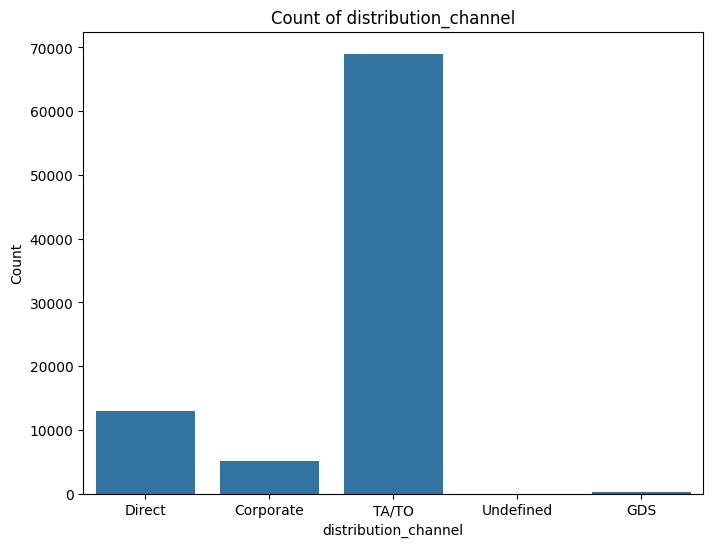

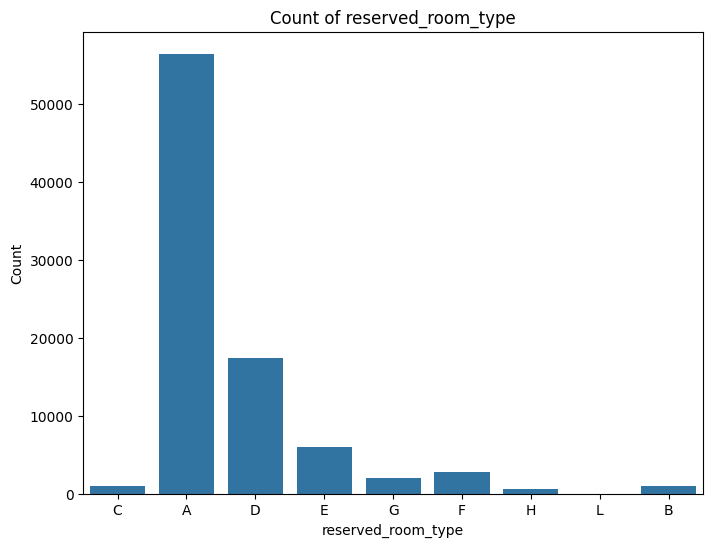

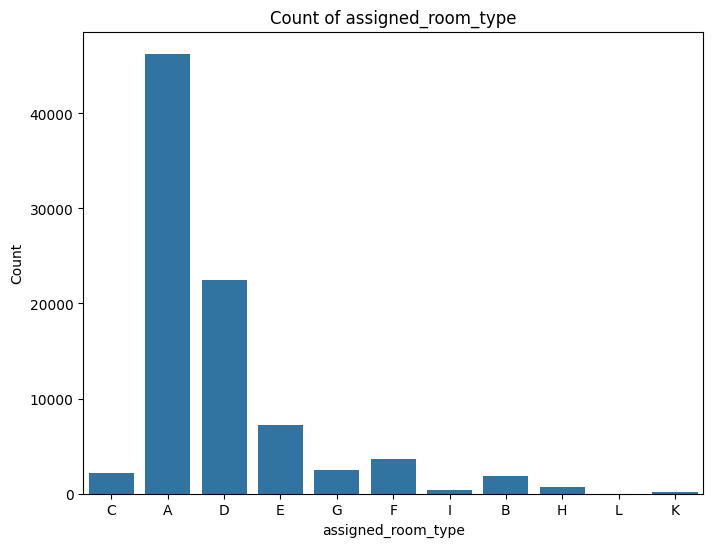

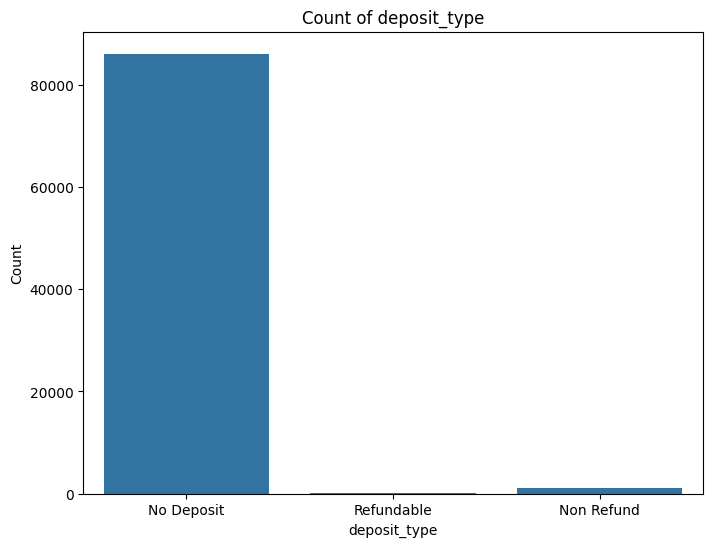

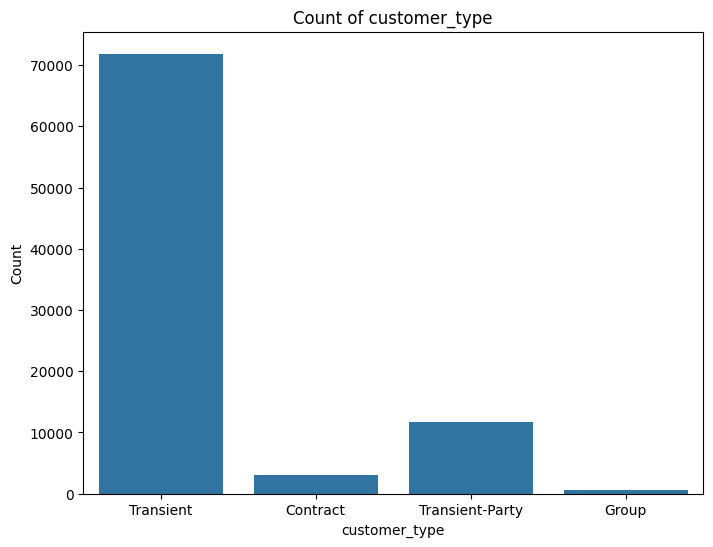

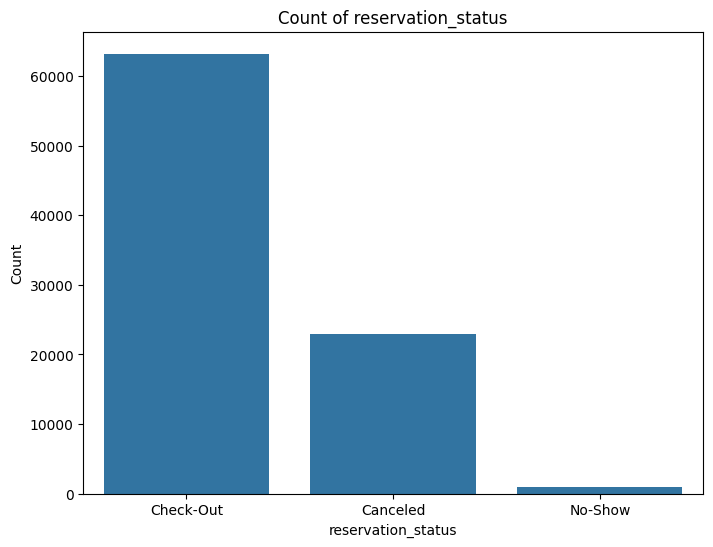

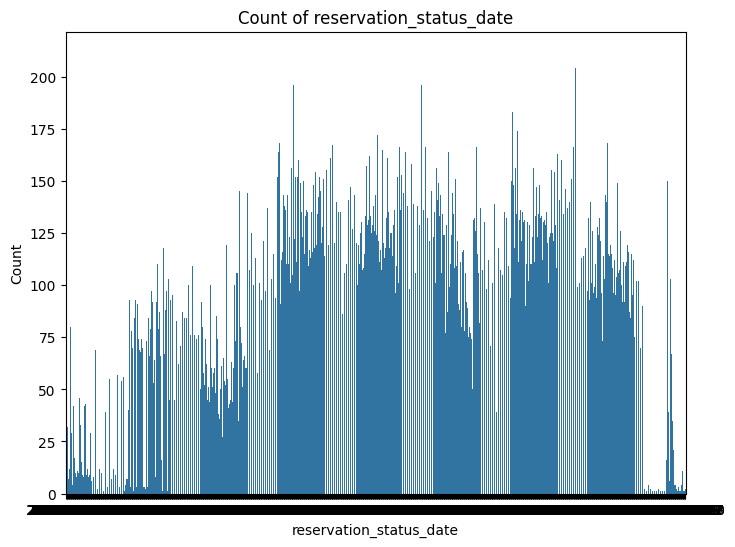

In [ ]:
# Distribution of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Count of {col}')
    plt.show()

In [ ]:
# Bivariate Analysis

# Display the number of guests by country among not cancelled bookings in a choropleth map
# Filter the data to only include rows where is_canceled is 0
not_canceled_mask = df['is_canceled'] == 0
not_canceled_df = df[not_canceled_mask]
# Group the data by country and sum the number of guests
guests_by_country = not_canceled_df.groupby('country')[['adults', 'children', 'babies']].sum()
# Reset the index
guests_by_country.reset_index(inplace=True)
# Rename the columns
guests_by_country.rename(columns={'adults': 'total_adults', 'children': 'total_children', 'babies': 'total_babies'}, inplace=True)
# Create a column for total number of guests
guests_by_country['total_guests'] = guests_by_country['total_adults'] + guests_by_country['total_children'] + guests_by_country['total_babies']
# Sort the data by total number of guests
guests_by_country.sort_values(by='total_guests', ascending=False, inplace=True)
# Create a choropleth map
guests_map = px.choropleth(guests_by_country, locations='country', color='total_guests',hover_name='country', color_continuous_scale=px.colors.sequential.Plasma)
# Add a title
guests_map.update_layout(title_text='Number of Guests by Country among Not Cancelled Bookings', title_x=0.5)
# Display the map
guests_map.show()


In [ ]:
# Display the number of guests by country among cancelled bookings in a choropleth map
# Filter the data to only include rows where is_canceled is 1
canceled_mask = df['is_canceled'] == 1
canceled_df = df[canceled_mask]
# Group the data by country and sum the number of guests
guests_by_country = canceled_df.groupby('country')[['adults', 'children', 'babies']].sum()
# Reset the index
guests_by_country.reset_index(inplace=True)
# Rename the columns
guests_by_country.rename(columns={'adults': 'total_adults', 'children': 'total_children', 'babies': 'total_babies'}, inplace=True)
# Create a column for total number of guests
guests_by_country['total_guests'] = guests_by_country['total_adults'] + guests_by_country['total_children'] + guests_by_country['total_babies']
# Sort the data by total number of guests
guests_by_country.sort_values(by='total_guests', ascending=False, inplace=True)
# Create a choropleth map
guests_map = px.choropleth(guests_by_country, locations='country', color='total_guests',hover_name='country', color_continuous_scale=px.colors.sequential.Plasma)
# Add a title
guests_map.update_layout(title_text='Number of Guests by Country among Cancelled Bookings', title_x=0.5)
# Display the map
guests_map.show()

In [ ]:
# Price variation over time (trend) by hotel type among not cancelled bookings in a line plot
# Filter the data to only include rows where is_canceled is 0
not_canceled_mask = df['is_canceled'] == 0
not_canceled_df = df[not_canceled_mask]
# Group the data by hotel and arrival_date_year and get the average price
price_by_year = not_canceled_df.groupby(['hotel', 'arrival_date_year'])[['adr']].mean()
# Reset the index
price_by_year.reset_index(inplace=True)
# Rename the columns
price_by_year.rename(columns={'adr': 'average_price'}, inplace=True)
# Create a line plot of price by year and hotel type
price_by_year_line_plot = px.line(price_by_year, x='arrival_date_year',y='average_price', color='hotel', title='Average Price by Year and Hotel Type')
# Add a title
price_by_year_line_plot.update_layout(title_text='Average Price by Year and Hotel Type among Not Cancelled Bookings', title_x=0.5)
# Display the plot
price_by_year_line_plot.show()

In [ ]:
# Price variation over time (trend) by hotel type among cancelled bookings in a line plot
# Filter the data to only include rows where is_canceled is 1
canceled_mask = df['is_canceled'] == 1
canceled_df = df[canceled_mask]
# Group the data by hotel and arrival_date_year and get the average price
price_by_year = canceled_df.groupby(['hotel', 'arrival_date_year'])[['adr']].mean()
# Reset the index
price_by_year.reset_index(inplace=True)
# Rename the columns
price_by_year.rename(columns={'adr': 'average_price'}, inplace=True)
# Create a line plot of price by year and hotel type
price_by_year_line_plot = px.line(price_by_year, x='arrival_date_year',y='average_price', color='hotel', title='Average Price by Year and Hotel Type')
# Add a title
price_by_year_line_plot.update_layout(title_text='Average Price by Year and Hotel Type among Cancelled Bookings', title_x=0.5)
# Display the plot
price_by_year_line_plot.show()

In [ ]:
# Price variation over time (seasonality) by hotel type among not cancelled bookings in a line plot
# Filter the data to only include rows where is_canceled is 0
not_canceled_mask = df['is_canceled'] == 0
not_canceled_df = df[not_canceled_mask]
# Group the data by hotel and arrival_date_month and get the average price
price_by_month = not_canceled_df.groupby(['hotel', 'arrival_date_month'])[['adr']].mean()
# Reset the index
price_by_month.reset_index(inplace=True)
# Rename the columns
price_by_month.rename(columns={'adr': 'average_price'}, inplace=True)
# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
# Sort the data by arrival_date_month
price_by_month['arrival_date_month'] = pd.Categorical(price_by_month['arrival_date_month'], categories=month_order, ordered=True)
price_by_month.sort_values(by='arrival_date_month', inplace=True)
# Create a line plot of average price vs month and hotel type
price_by_month_line_plot = px.line(price_by_month, x='arrival_date_month',y='average_price', color='hotel', title='Average Price by Month and Hotel Type')
# Add a title
price_by_month_line_plot.update_layout(title_text='Average Price by Month and Hotel Type among Not Cancelled Bookings', title_x=0.5)
# Display the plot
price_by_month_line_plot.show()

In [ ]:
# Price variation over time (seasonality) by hotel type among cancelled bookings in a line plot
# Filter the data to only include rows where is_canceled is 1
canceled_mask = df['is_canceled'] == 1
canceled_df = df[canceled_mask]
# Group the data by hotel and arrival_date_month and get the average price
price_by_month = canceled_df.groupby(['hotel', 'arrival_date_month'])[['adr']].mean()
# Reset the index
price_by_month.reset_index(inplace=True)
# Rename the columns
price_by_month.rename(columns={'adr': 'average_price'}, inplace=True)
# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
# Sort the data by arrival_date_month
price_by_month['arrival_date_month'] = pd.Categorical(price_by_month['arrival_date_month'], categories=month_order, ordered=True)
price_by_month.sort_values(by='arrival_date_month', inplace=True)
# Create a line plot of average price vs month and hotel type
price_by_month_line_plot = px.line(price_by_month, x='arrival_date_month',y='average_price', color='hotel', title='Average Price by Month and Hotel Type')
# Add a title
price_by_month_line_plot.update_layout(title_text='Average Price by Month and Hotel Type among Cancelled Bookings', title_x=0.5)
# Display the plot
price_by_month_line_plot.show()

In [ ]:
# Price variation by year and hotel type among not cancelled bookings in a box plot
# Filter the data to only include rows where is_canceled is 0
not_canceled_mask = df['is_canceled'] == 0
not_canceled_df = df[not_canceled_mask]
# Create a box plot of price vs hotel type
price_by_hotel_box_plot = px.box(not_canceled_df, x='arrival_date_year', y='adr', color='hotel', title='Price by Hotel Type')
# Add a title
price_by_hotel_box_plot.update_layout(title_text='Price by Hotel Type among Not Cancelled Bookings', title_x=0.5)
# Display the plot
price_by_hotel_box_plot.show()

In [ ]:
# Price variation by year and hotel type among cancelled bookings in a box plot
# Filter the data to only include rows where is_canceled is 1
canceled_mask = df['is_canceled'] == 1
canceled_df = df[canceled_mask]
# Create a box plot of price vs hotel type
price_by_hotel_box_plot = px.box(canceled_df, x='arrival_date_year', y='adr', color='hotel', title='Price by Hotel Type')
# Add a title
price_by_hotel_box_plot.update_layout(title_text='Price by Hotel Type among Cancelled Bookings', title_x=0.5)
# Display the plot
price_by_hotel_box_plot.show()

In [ ]:
# Number of bookings variation over time (trend) by hotel type among not cancelled bookings in a line plot
# Filter the data to only include rows where is_canceled is 0
not_canceled_mask = df['is_canceled'] == 0
not_canceled_df = df[not_canceled_mask]
# Group the data by hotel and arrival_date_year and get the number of bookings
bookings_by_year = not_canceled_df.groupby(['hotel', 'arrival_date_year'])[['is_canceled']].count()
# Reset the index
bookings_by_year.reset_index(inplace=True)
# Rename the columns
bookings_by_year.rename(columns={'is_canceled': 'number_of_bookings'}, inplace=True)
# Create a line plot of number of bookings by year and hotel type
bookings_by_year_line_plot = px.line(bookings_by_year, x='arrival_date_year',y='number_of_bookings', color='hotel', title='Number of Bookings by Year and Hotel Type')
# Add a title
bookings_by_year_line_plot.update_layout(title_text='Number of Bookings by Year and Hotel Type among Not Cancelled Bookings', title_x=0.5)
# Display the plot
bookings_by_year_line_plot.show()

In [ ]:
 # Number of bookings variation over time (trend) by hotel type among cancelled bookings in a line plot
# Filter the data to only include rows where is_canceled is 1
canceled_mask = df['is_canceled'] == 1
canceled_df = df[canceled_mask]
# Group the data by hotel and arrival_date_year and get the number of bookings
bookings_by_year = canceled_df.groupby(['hotel', 'arrival_date_year'])[['is_canceled']].count()
# Reset the index
bookings_by_year.reset_index(inplace=True)
# Rename the columns
bookings_by_year.rename(columns={'is_canceled': 'number_of_bookings'}, inplace=True)
# Create a line plot of number of bookings by year and hotel type
bookings_by_year_line_plot = px.line(bookings_by_year, x='arrival_date_year',y='number_of_bookings', color='hotel', title='Number of Bookings by Year and Hotel Type')
# Add a title
bookings_by_year_line_plot.update_layout(title_text='Number of Bookings by Year and Hotel Type among Cancelled Bookings', title_x=0.5)
# Display the plot
bookings_by_year_line_plot.show()

In [ ]:
# Number of bookings variation over time (seasonality) by hotel type among not cancelled bookings in a line plot
# Filter the data to only include rows where is_canceled is 0
not_canceled_mask = df['is_canceled'] == 0
not_canceled_df = df[not_canceled_mask]
# Group the data by hotel and arrival_date_month and get the number of bookings
bookings_by_month = not_canceled_df.groupby(['hotel', 'arrival_date_month'])[['is_canceled']].count()
# Reset the index
bookings_by_month.reset_index(inplace=True)
# Rename the columns
bookings_by_month.rename(columns={'is_canceled': 'number_of_bookings'}, inplace=True)
# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
# Sort the data by arrival_date_month
bookings_by_month['arrival_date_month'] = pd.Categorical(bookings_by_month['arrival_date_month'], categories=month_order, ordered=True)
bookings_by_month.sort_values(by='arrival_date_month', inplace=True)
# Create a line plot of number of bookings vs month and hotel type
bookings_by_month_line_plot = px.line(bookings_by_month, x='arrival_date_month',y='number_of_bookings', color='hotel', title='Number of Bookings by Month and Hotel Type')
# Add a title
bookings_by_month_line_plot.update_layout(title_text='Number of Bookings by Month and Hotel Type among Not Cancelled Bookings', title_x=0.5)
# Display the plot
bookings_by_month_line_plot.show()

In [ ]:
# Number of bookings variation over time (seasonality) by hotel type among cancelled bookings in a line plot
# Filter the data to only include rows where is_canceled is 1
canceled_mask = df['is_canceled'] == 1
canceled_df = df[canceled_mask]
# Group the data by hotel and arrival_date_month and get the number of bookings
bookings_by_month = canceled_df.groupby(['hotel', 'arrival_date_month'])[['is_canceled']].count()
# Reset the index
bookings_by_month.reset_index(inplace=True)
# Rename the columns
bookings_by_month.rename(columns={'is_canceled': 'number_of_bookings'}, inplace=True)
# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
# Sort the data by arrival_date_month
bookings_by_month['arrival_date_month'] = pd.Categorical(bookings_by_month['arrival_date_month'], categories=month_order, ordered=True)
bookings_by_month.sort_values(by='arrival_date_month', inplace=True)
# Create a line plot of number of bookings vs month and hotel type
bookings_by_month_line_plot = px.line(bookings_by_month, x='arrival_date_month',y='number_of_bookings', color='hotel', title='Number of Bookings by Month and Hotel Type')
# Add a title
bookings_by_month_line_plot.update_layout(title_text='Number of Bookings by Month and Hotel Type among Cancelled Bookings', title_x=0.5)
# Display the plot
bookings_by_month_line_plot.show()

In [ ]:
# Price variation by reserved room type among not cancelled bookings in a box plot
# Filter the data to only include rows where is_canceled is 0
not_canceled_mask = df['is_canceled'] == 0
not_canceled_df = df[not_canceled_mask]
# Create a box plot of price vs reserved room type
price_by_room_type_box_plot = px.box(not_canceled_df, x='reserved_room_type', y='adr', color='hotel', title='Price by Reserved Room Type')
# Add a title
price_by_room_type_box_plot.update_layout(title_text='Price by Reserved Room Type among Not Cancelled Bookings', title_x=0.5)
# Display the plot
price_by_room_type_box_plot.show()

In [ ]:
# Price variation by reserved room type among cancelled bookings in a box plot
# Filter the data to only include rows where is_canceled is 1
canceled_mask = df['is_canceled'] == 1
canceled_df = df[canceled_mask]
# Create a box plot of price vs reserved room type
price_by_room_type_box_plot = px.box(canceled_df, x='reserved_room_type', y='adr', color='hotel', title='Price by Reserved Room Type')
# Add a title
price_by_room_type_box_plot.update_layout(title_text='Price by Reserved Room Type among Cancelled Bookings', title_x=0.5)
# Display the plot
price_by_room_type_box_plot.show()

In [ ]:
# Convert "reservation_status_date" to separate columns for year, month, and day
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['reservation_status_date_year'] = df['reservation_status_date'].dt.year
df['reservation_status_date_month'] = df['reservation_status_date'].dt.month
df['reservation_status_date_day'] = df['reservation_status_date'].dt.day
# Drop the original "reservation_status_date" column
df.drop('reservation_status_date', axis=1, inplace=True)

# Perform correlation analysis on the numerical variables
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns
# Display the correlation matrix in a heatmap with the correlation values in the cells
correlation_matrix_heatmap = px.imshow(df[numerical_variables].corr())
# Display the correlation values in the heatmap cells
for i in range(len(numerical_variables)):
    for j in range(len(numerical_variables)):
        text = correlation_matrix_heatmap.data[0].z[i][j]
        correlation_matrix_heatmap.add_annotation(
            x=j, y=i, text=round(text, 2), showarrow=False)
# Add a title
correlation_matrix_heatmap.update_layout(title_text='Correlation Matrix Heatmap', title_x=0.5)
# Display the plot
correlation_matrix_heatmap.show()

# Displaying the correlation values with the target variable
# Get the correlation values with the target variable
correlation_values = df[numerical_variables].corr()['is_canceled'].sort_values(ascending=False)
# Display the correlation values in a bar plot
correlation_values_bar_plot = px.bar(correlation_values, x=correlation_values.values,y=correlation_values.index, orientation='h', title='Correlation Values with the Target Variable')
# Add a title
correlation_values_bar_plot.update_layout(title_text='Correlation Values with the Target Variable', title_x=0.5)
# Display the plot
correlation_values_bar_plot.show()

# Store the useless variables in a list to drop them later
useless_variables = []

# Dropping the highly correlated variables
# Drop the variable "reservation_status" as it is very highly correlated with the target variable
useless_variables.append('reservation_status')
# Drop the variable "reservation_status_date_year" as it is highly correlated with "arrival_date_year"
useless_variables.append('reservation_status_date_year')
# Drop the variable "reservation_status_date_month" as it is highly correlated with "arrival_date_week_number"
useless_variables.append('reservation_status_date_month')
# Drop the variable "reservation_status_date_day" as it is highly correlated with "arrival_date_day_of_month"
useless_variables.append('reservation_status_date_day')

# Dropping the variables with low correlation with the target variable
# Get the variables with low correlation with the target variable
low_correlation_variables = correlation_values[(correlation_values < 0.05) & (correlation_values > -0.05)]
# Print the variables with low correlation with the target variable
print('Variables with low correlation with the target variable:')
print(low_correlation_variables)
print('-' * 100)
# Drop the variables with low correlation with the target variable
useless_variables.extend(low_correlation_variables.index)

# Dropping the useless variables
df.drop(useless_variables, axis=1, inplace=True)

# Converting categorical variables to numerical variables
# Get the categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns
# Print the unique values of each categorical variable
for variable in categorical_variables:
    print(variable, df[variable].unique(), sep=': ')
# Encode the categorical variables
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

# Normalize the numerical variables except the target variable
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns.drop('is_canceled')
for variable in numerical_variables:
    # Get the minimum and maximum values
    minimum, maximum = df[variable].min(), df[variable].max()
    # Normalize the variable
    if minimum != maximum:
        df[variable] = (df[variable] - minimum) / (maximum - minimum)
    else:
        df[variable] = 0
# Print the first 5 rows of the data
print('First 5 rows of the data:')
print(df.head())
print('-' * 100)
# Print the variance of each variable
print('Variance of each variable:')
print(df.var())

Variables with low correlation with the target variable:
arrival_date_day_of_month    0.005449
days_in_waiting_list         0.004710
arrival_date_week_number     0.001691
agent                       -0.001145
babies                      -0.020627
Name: is_canceled, dtype: float64
----------------------------------------------------------------------------------------------------
hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 

In [ ]:
def evaluate_model(model, X, y, resampling_strategy_name, class_ratio, folds, model_name):
    # Get the predictions
    y_pred = model.predict(X)

    # Get the confusion matrix
    _confusion_matrix = pd.crosstab(
        y, y_pred, rownames=['Actual'], colnames=['Predicted'])

    # Get the accuracy score
    _accuracy_score = accuracy_score(y, y_pred)

    # Get the precision score
    _precision_score = precision_score(y, y_pred, zero_division=1)

    # Get the recall score
    _recall_score = recall_score(y, y_pred, zero_division=1)

    # Get the f1 score
    _f1_score = f1_score(y, y_pred)

    # Get the roc auc score
    _roc_auc_score = roc_auc_score(y, y_pred)

    # Display the roc curve
    _roc_curve = roc_curve(y, y_pred)
    roc_curve_plot = px.line(x=_roc_curve[0], y=_roc_curve[1])
    # Add a title
    roc_curve_plot.update_layout(
        title_text=f'ROC Curve for {model_name} with {resampling_strategy_name} Resampling and {class_ratio} Class Ratio, {folds}-Fold Cross Validation', title_x=0.5)
    # Add x-axis and y-axis labels
    roc_curve_plot.update_xaxes(title_text='False Positive Rate')
    roc_curve_plot.update_yaxes(title_text='True Positive Rate')
    # Display the plot
    roc_curve_plot.show()

    # Return the confusion matrix, accuracy score, precision score, recall score, f1 score, and roc auc score
    return _confusion_matrix, _accuracy_score, _precision_score, _recall_score, _f1_score, _roc_auc_score

In [ ]:
 X, y = df.drop('is_canceled', axis=1), df['is_canceled']


In [ ]:
resampling_strategies = {
        # 'No Resampling': None,
        # 'Random Oversampling': RandomOverSampler(random_state=42),
        'SMOTE': SMOTE(random_state=42),
        'ADASYN': ADASYN(random_state=42),
    }

# Class ratios to resample the data for each resampling strategy
class_ratios = [1.0, 0.5, 0.33, 0.25, 0.1]

# Different number of folds for k-fold cross-validation
num_folds_list = [3, 5, 10]

In [ ]:
# Defining the models
models = {
    'Logistic Regression': {
        'Sklearn': SciKitLearnLogisticRegression(),
    },
    'Naive Bayes': {
        'Sklearn': SciKitLearnNaiveBayes(),
    },
    'K Nearest Neighbors': {
        'Sklearn': SciKitLearnKNearestNeighbors(),
    },
    'Decision Tree': {
        'Sklearn': SciKitLearnDecisionTree(),
    }

    }

In [ ]:
train_val_split_ratio = 0.8  # 80% for train/validation
test_split_ratio = 0.2  # 20% for test

# Store the results in a dictionary
results = {}

In [ ]:

# Loop over the resampling strategies
for resampling_strategy_name, resampling_strategy in resampling_strategies.items():
    # Store the results for each resampling strategy in a dictionary
    results[resampling_strategy_name] = {}

        # Loop over the class ratios
    for class_ratio in class_ratios:
        # Store the results for each class ratio in a dictionary
        results[resampling_strategy_name][class_ratio] = {}

        # Resample the data
        if resampling_strategy is not None:
            X_resampled, y_resampled = resampling_strategy.fit_resample(X, y)
        else:
            X_resampled, y_resampled = X, y

            # Split into train and test sets
        X_train_val, X_test, y_train_val, y_test = train_test_split(X_resampled, y_resampled, test_size=test_split_ratio, random_state=42)

         # Create the model
        model = SciKitLearnLogisticRegression()
        model.fit(X_train_val, y_train_val)

        _confusion_matrix, _accuracy_score, _precision_score, _recall_score, _f1_score, _roc_auc_score = evaluate_model(
                model, X_test, y_test, resampling_strategy_name, class_ratio, 1, 'Logistic Regression')

        results[resampling_strategy_name][class_ratio] = {
                'Confusion Matrix': _confusion_matrix,
                'Accuracy': _accuracy_score,
                'Precision': _precision_score,
                'Recall': _recall_score,
                'F1 Score': _f1_score,
                'ROC AUC Score': _roc_auc_score,
            }

# Print the results
for resampling_strategy_name in resampling_strategies:
    for class_ratio in class_ratios:
        print('Results for {} using {} class ratio:'.format(resampling_strategy_name, class_ratio))
        print(results[resampling_strategy_name][class_ratio])
        print('-' * 100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Results for SMOTE using 1.0 class ratio:
{'Confusion Matrix': Predicted     0     1
Actual               
0          9563  3216
1          2535  9975, 'Accuracy': 0.7725888726323697, 'Precision': 0.7561974073231749, 'Recall': 0.7973621103117506, 'F1 Score': 0.7762343877670129, 'ROC AUC Score': 0.7728496129459996}
----------------------------------------------------------------------------------------------------
Results for SMOTE using 0.5 class ratio:
{'Confusion Matrix': Predicted     0     1
Actual               
0          9563  3216
1          2535  9975, 'Accuracy': 0.7725888726323697, 'Precision': 0.7561974073231749, 'Recall': 0.7973621103117506, 'F1 Score': 0.7762343877670129, 'ROC AUC Score': 0.7728496129459996}
----------------------------------------------------------------------------------------------------
Results for SMOTE using 0.33 class ratio:
{'Confusion Matrix': Predicted     0     1
Actual               
0          9563  3216
1          2535  9975, 'Accuracy': 0.77

In [ ]:
# Initialize a variable to store the results
results = {}

for resampling_strategy_name, resampling_strategy in resampling_strategies.items():
        # Store the results for each resampling strategy in a dictionary
        results[resampling_strategy_name] = {}
        # Iterate over class ratios
        for class_ratio in class_ratios:
            # Store the results for each class ratio in a dictionary
            results[resampling_strategy_name][class_ratio] = {}
            # Resample the data
            if resampling_strategy is not None:
                X_resampled, y_resampled = resampling_strategy.fit_resample(
                    X, y)
            else:
                X_resampled, y_resampled = X, y

            # Split into train and test sets
            X_train_val, X_test, y_train_val, y_test = train_test_split(
                X_resampled, y_resampled, test_size=test_split_ratio, random_state=42)

            # Create the model
            model = SciKitLearnNaiveBayes()

            # Train the model
            model.fit(X_train_val, y_train_val)

            # Evaluate the model on the test set
            _confusion_matrix, _accuracy_score, _precision_score, _recall_score, _f1_score, _roc_auc_score = evaluate_model(
                model, X_test, y_test, resampling_strategy_name, class_ratio, 1, ' Naive Bayes')

            # Store the results in a dictionary
            results[resampling_strategy_name][class_ratio] = {
                'Confusion Matrix': _confusion_matrix,
                'Accuracy': _accuracy_score,
                'Precision': _precision_score,
                'Recall': _recall_score,
                'F1 Score': _f1_score,
                'ROC AUC Score': _roc_auc_score,
            }

# Print the results
for resampling_strategy_name in resampling_strategies:
        for class_ratio in class_ratios:
            print('Results for {} using {} class ratio:'.format(
                resampling_strategy_name, class_ratio))
            print(results[resampling_strategy_name][class_ratio])
            print('-' * 100)

Results for SMOTE using 1.0 class ratio:
{'Confusion Matrix': Predicted     0     1
Actual               
0          7946  4833
1          2811  9699, 'Accuracy': 0.6977341927320179, 'Precision': 0.6674236168455822, 'Recall': 0.7752997601918465, 'F1 Score': 0.7173285999556246, 'ROC AUC Score': 0.698550576551045}
----------------------------------------------------------------------------------------------------
Results for SMOTE using 0.5 class ratio:
{'Confusion Matrix': Predicted     0     1
Actual               
0          7946  4833
1          2811  9699, 'Accuracy': 0.6977341927320179, 'Precision': 0.6674236168455822, 'Recall': 0.7752997601918465, 'F1 Score': 0.7173285999556246, 'ROC AUC Score': 0.698550576551045}
----------------------------------------------------------------------------------------------------
Results for SMOTE using 0.33 class ratio:
{'Confusion Matrix': Predicted     0     1
Actual               
0          7946  4833
1          2811  9699, 'Accuracy': 0.6977

In [ ]:
 results = {}

# Iterate over resampling techniques
 for resampling_strategy_name, resampling_strategy in resampling_strategies.items():
        # Store the results for each resampling strategy in a dictionary
        results[resampling_strategy_name] = {}
        # Iterate over class ratios
        for class_ratio in class_ratios:
            # Store the results for each class ratio in a dictionary
            results[resampling_strategy_name][class_ratio] = {}
            # Resample the data
            if resampling_strategy is not None:
                X_resampled, y_resampled = resampling_strategy.fit_resample(
                    X, y)
            else:
                X_resampled, y_resampled = X, y

            # Split into train and test sets
            X_train_val, X_test, y_train_val, y_test = train_test_split(
                X_resampled, y_resampled, test_size=test_split_ratio, random_state=42)

            # Create the model
            model = SciKitLearnKNearestNeighbors()

            # Train the model
            model.fit(X_train_val, y_train_val)

            # Evaluate the model on the test set
            _confusion_matrix, _accuracy_score, _precision_score, _recall_score, _f1_score, _roc_auc_score = evaluate_model(
                model, X_test, y_test, resampling_strategy_name, class_ratio, 1, 'K Nearest Neighbors')

            # Store the results in a dictionary
            results[resampling_strategy_name][class_ratio] = {
                'Confusion Matrix': _confusion_matrix,
                'Accuracy': _accuracy_score,
                'Precision': _precision_score,
                'Recall': _recall_score,
                'F1 Score': _f1_score,
                'ROC AUC Score': _roc_auc_score,
            }

    # Print the results
 for resampling_strategy_name in resampling_strategies:
        for class_ratio in class_ratios:
            print('Results for {} using {} class ratio:'.format(
                resampling_strategy_name, class_ratio))
            print(results[resampling_strategy_name][class_ratio])
            print('-' * 100)


Results for SMOTE using 1.0 class ratio:
{'Confusion Matrix': Predicted     0      1
Actual                
0          9268   3511
1          1383  11127, 'Accuracy': 0.8064771244414568, 'Precision': 0.7601448285284875, 'Recall': 0.8894484412470024, 'F1 Score': 0.8197288934728157, 'ROC AUC Score': 0.8073504042059411}
----------------------------------------------------------------------------------------------------
Results for SMOTE using 0.5 class ratio:
{'Confusion Matrix': Predicted     0      1
Actual                
0          9268   3511
1          1383  11127, 'Accuracy': 0.8064771244414568, 'Precision': 0.7601448285284875, 'Recall': 0.8894484412470024, 'F1 Score': 0.8197288934728157, 'ROC AUC Score': 0.8073504042059411}
----------------------------------------------------------------------------------------------------
Results for SMOTE using 0.33 class ratio:
{'Confusion Matrix': Predicted     0      1
Actual                
0          9268   3511
1          1383  11127, 'Acc